# Newton-Raphson Metodu
---
*   Lineer olmayan ve analitik çözümü olmayan bir bilinmeyenli denklemlerin, bir aralıkta çözümünü bulmaya yarar.
*   Kök ararken belirlenen aralıktan çıkabilir, işlemler sonunda muhakkak tekrar belirlenen aralıkta sonuç verir. (açık aralık metotdur)
*   Kökü bulma konusunda ikiye bölme ve doğrusal interpolasyondan daha hızlıdır.



SymPy, matematiksel ifadeler içeren fonksiyonlar üzerinde çalışabilmemizi sağlayan bir kütüphanedir. Burada onu import ediyoruz

In [82]:
import sympy as sp

Burada türev almak için fonksiyon oluşturduk. SymPy kütüphanesinin diff fonksiyonu ile türev alıyoruz. bundan önce gönderdiğimiz formülün SymPy a uygunluğuna bakıyoruz. Fonksiyon sonucunda fonksiyonun türevinin yanında x değerini bir sembol olarak gönderiyor.

In [83]:
def take_derivative(f):
    x = sp.Symbol("x")
    if isinstance(f, sp.Function):
        f_sympy = f(x)
    else:
        f_sympy = sp.sympify(f(x))

    f_prime = sp.diff(f_sympy, x)
    return sp.lambdify(x, f_prime)

Burada Newton-Rapshon yöntemini yapacak fonksiyonu oluşturduk. Fonksiyon 5 parametre alıyor. Bunlar sırayla:
- Fonksiyonumuz
- Fonksiyonumuzun Türevi
- Başlangıç Değeri
- Hata Oranı (Tolerans Değeri)
- Maksimum İterasyon Sayısı
----------------------
Öncelikle formülü kod olarak yazıyoruz

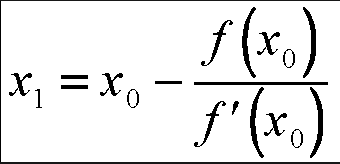
```
x_i = x_0 - function(x_0) / derivative(x_0)
```
Daha sonra hata değerimizin altında olup olmadığını kontrol ediyoruz


```
if abs(x_i - x_0) < tol:
```

Eğer hata değerimizin altındaysa fonksiyonu sonlandırıp bulunan kökü ve iterasyon değerini döndürüyoruz.

In [84]:
def newton_raphson(function, derivative, x_0, tol=1e-10, max_iter=100):
    for i in range(max_iter):
        print("---------------------------------------------------------")
        x_i = x_0 - function(x_0) / derivative(x_0)
        print(f"{i}. adım:\n x_i = {round(x_0, 6)} - {round(function(x_0), 6)} / {round(derivative(x_0), 6)}")
        print(f"Buradan x_i = {round(x_i, 6)} sonucunu alıyoruz.")
        print(f"{round(x_i, 6)}-{round(x_0, 6)}<{float(tol)} işlemini yaparak hata oranımızdan küçük bir sonuç bulup bulamadığımıza bakıyoruz.")
        if abs(x_i - x_0) < tol:
            print(f"Hata oranımız {x_i - x_0} \nHata oranımız aralıkta çıktığı için işlemi bitiriyoruz.")
            return (x_i, i)
        print(f"Hata oranımız {x_i - x_0} \nHata oranımız yüksek çıktığı için devam ediyoruz")
        x_0 = x_i
    return (x_i, max_iter)

Girdi olarak fonksiyonu alabilmek için bu fonksiyonu kullanıyoruz

In [85]:
def get_function_from_input():
    user_function = input("Lütfen fonksiyonunuzu giriniz: ")
    return lambda x: eval(user_function)

Kullanıcıdan alt sınır, üst sınır, başlangıç değeri, tolerans değeri ve fonksiyonu istiyoruz. Eğer algoritmanın bulduğu kök aralık içindeyse kökü yazıyor, eğer değilse


```
Kök bulunamadı.
Denkleminizin bu aralıkta kökü olduğuna eminseniz lütfen başlangıç noktasını değiştirin.
```
şeklinde uyarı veriyor.


In [88]:
a = int(input("alt sınırı giriniz: "))
b = int(input("üst sınırı giriniz: "))
x_0 = int(input("Başlangıç değerini giriniz: "))
tolerance = float(input("Lütfen tolerans aralığını giriniz: "))
user_function = get_function_from_input()
print("---------------------------------------------------------")
derivative_f = take_derivative(user_function)
root, iterations = newton_raphson(user_function, derivative_f, x_0, tol=tolerance)
print("---------------------------------------------------------")
if root <= b and a <= root:
  print(f"Fonksiyonun kökü: {root} \nBu kök {iterations} Adımda bulundu")
else:
  print("Kök bulunamadı. \nDenkleminizin bu aralıkta kökü olduğuna eminseniz lütfen başlangıç noktasını değiştirin.")

alt sınırı giriniz: 0
üst sınırı giriniz: 1
Başlangıç değerini giriniz: 0
Lütfen tolerans aralığını giriniz: 0.000001
Lütfen fonksiyonunuzu giriniz: x**3 - 7*x**2 + 14*x - 6
---------------------------------------------------------
---------------------------------------------------------
0. adım:
 x_i = 0 - -6 / 14
Buradan x_i = 0.428571 sonucunu alıyoruz.
0.428571-0<1e-06 işlemini yaparak hata oranımızdan küçük bir sonuç bulup bulamadığımıza bakıyoruz.
Hata oranımız 0.42857142857142855 
Hata oranımız yüksek çıktığı için devam ediyoruz
---------------------------------------------------------
1. adım:
 x_i = 0.428571 - -1.206997 / 8.55102
Buradan x_i = 0.569724 sonucunu alıyoruz.
0.569724-0.428571<1e-06 işlemini yaparak hata oranımızdan küçük bir sonuç bulup bulamadığımıza bakıyoruz.
Hata oranımız 0.14115240368223664 
Hata oranımız yüksek çıktığı için devam ediyoruz
---------------------------------------------------------
2. adım:
 x_i = 0.569724 - -0.111039 / 6.997622
Buradan x_i = 